In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

In [140]:
drivers_df = pd.read_csv('Data/drivers.csv')
races_df = pd.read_csv('Data/races.csv')
lap_times_df = pd.read_csv('Data/lap_times.csv')
pit_stops_df = pd.read_csv('Data/pit_stops.csv')
results_df = pd.read_csv('Data/results.csv')
constructors_df = pd.read_csv('Data/constructors.csv')

In [148]:
races_df['date'] = pd.to_datetime(races_df['date'])
drivers_df['dob'] = pd.to_datetime(drivers_df['dob'])

In [150]:
#for numerical data, we are using median 
numerical_columns = lap_times_df.select_dtypes(include=[np.number]).columns
lap_times_df[numerical_columns] = lap_times_df[numerical_columns].fillna(lap_times_df[numerical_columns].median())
        
# For categorical columns, fill with mode
categorical_columns = drivers_df.select_dtypes(include=['object']).columns
drivers_df[categorical_columns] = drivers_df[categorical_columns].fillna(drivers_df[categorical_columns].mode().iloc[0])

In [156]:
races_df['year'] = pd.to_datetime(races_df['date']).dt.year
avg_lap_times = lap_times_df.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index()

Text(0, 0.5, 'Time (milliseconds)')

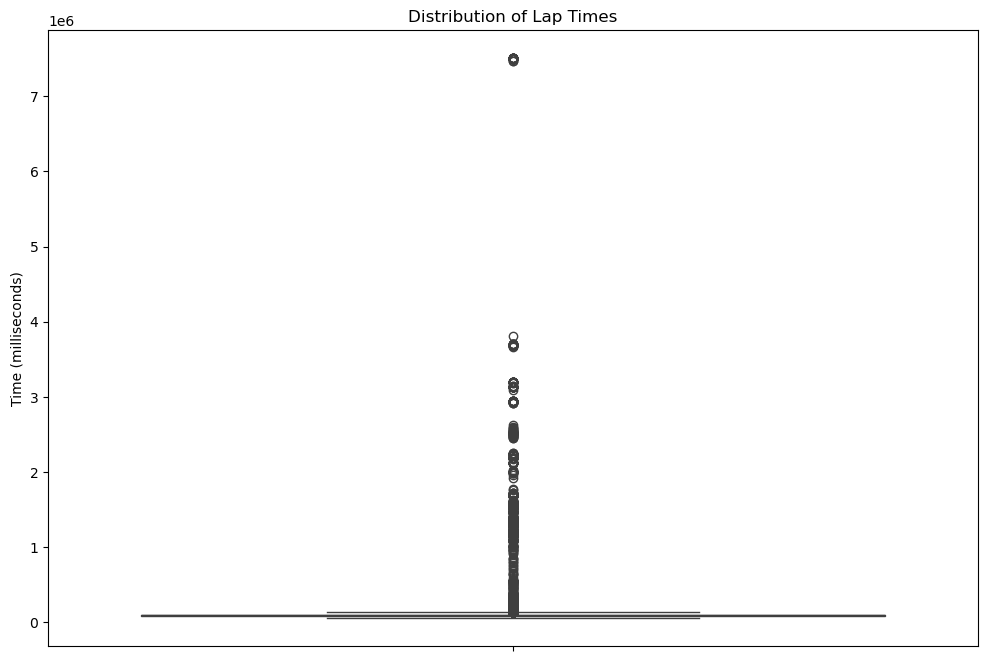

In [195]:
# Lap time distribution over time
plt.figure(figsize=(12, 8))
sns.boxplot(data=lap_times_df, y='milliseconds')
plt.title('Distribution of Lap Times')
plt.ylabel('Time (milliseconds)')

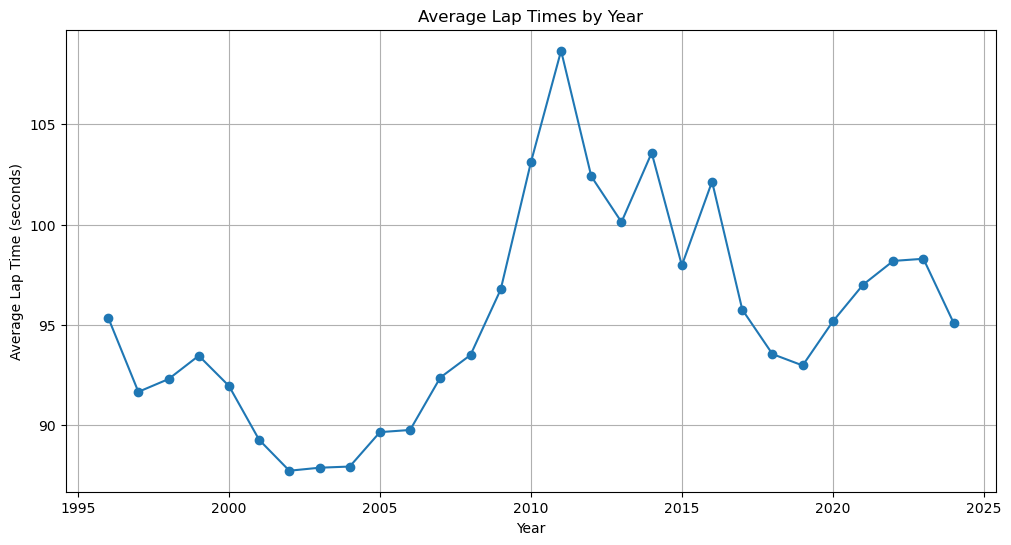

In [162]:
 # Lap time trends over years
merged_data = pd.merge(lap_times_df, races_df[['raceId', 'year']], on='raceId')
yearly_avg = merged_data.groupby('year')['milliseconds'].mean().reset_index()
        
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['milliseconds']/1000, marker='o')
plt.title('Average Lap Times by Year')
plt.xlabel('Year')
plt.ylabel('Average Lap Time (seconds)')
plt.grid(True)

Text(0, 0.5, 'Position Variation (std)')

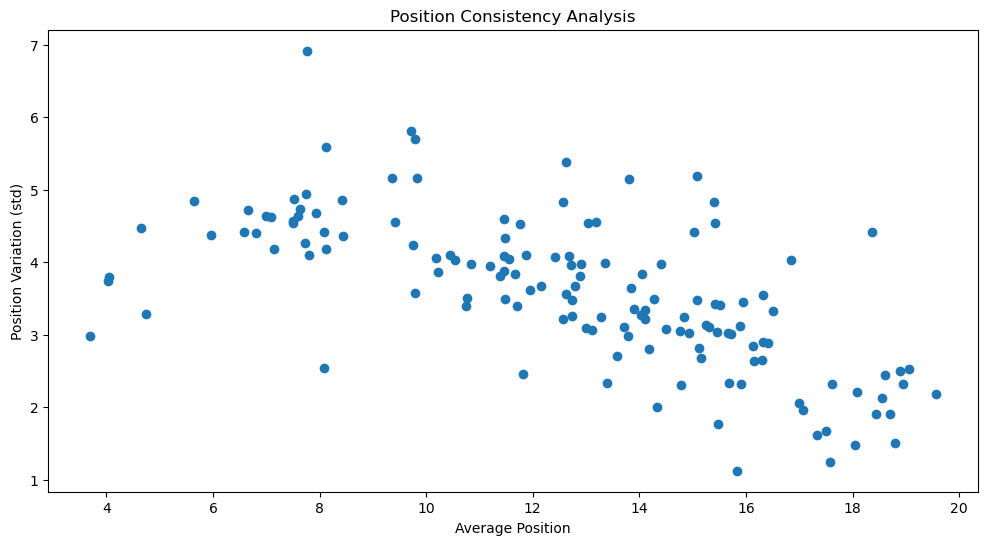

In [164]:
# Position changes throughout races
position_changes = lap_times_df.groupby('driverId')['position'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(position_changes['mean'], position_changes['std'])
plt.title('Position Consistency Analysis')
plt.xlabel('Average Position')
plt.ylabel('Position Variation (std)')

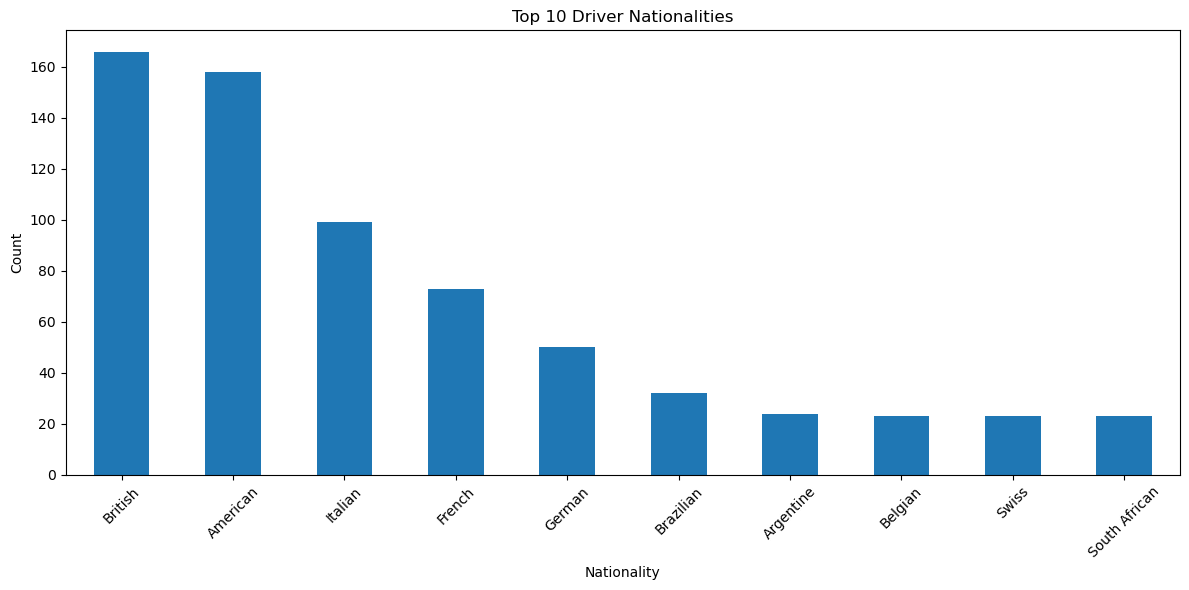

In [166]:
 # Driver nationality distribution
plt.figure(figsize=(12, 6))
drivers_df['nationality'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Driver Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

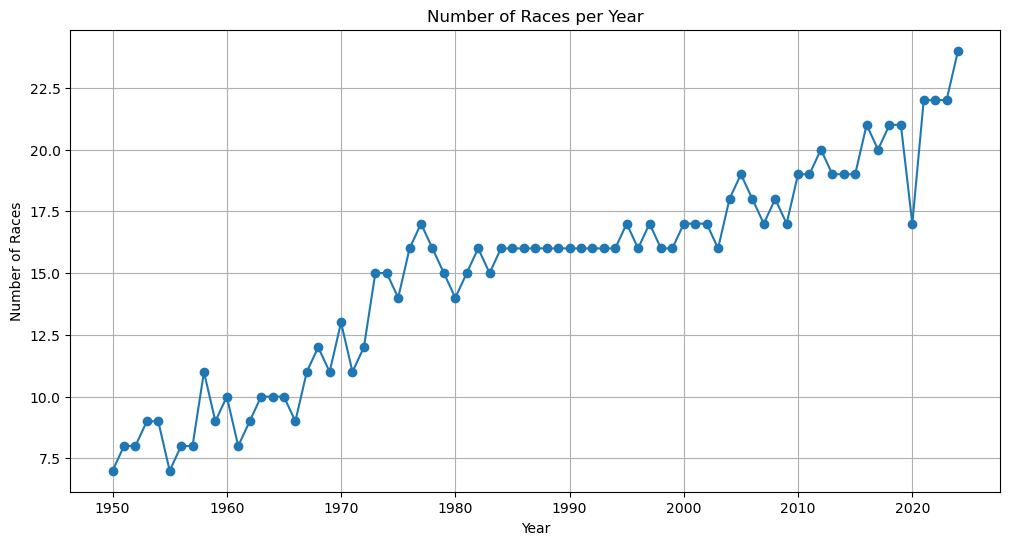

In [177]:
df = pd.read_csv("Data/races.csv")
races_by_year = df.groupby('year').size()
plt.figure(figsize=(12, 6))
races_by_year.plot(kind='line', marker='o')
plt.title('Number of Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid(True)

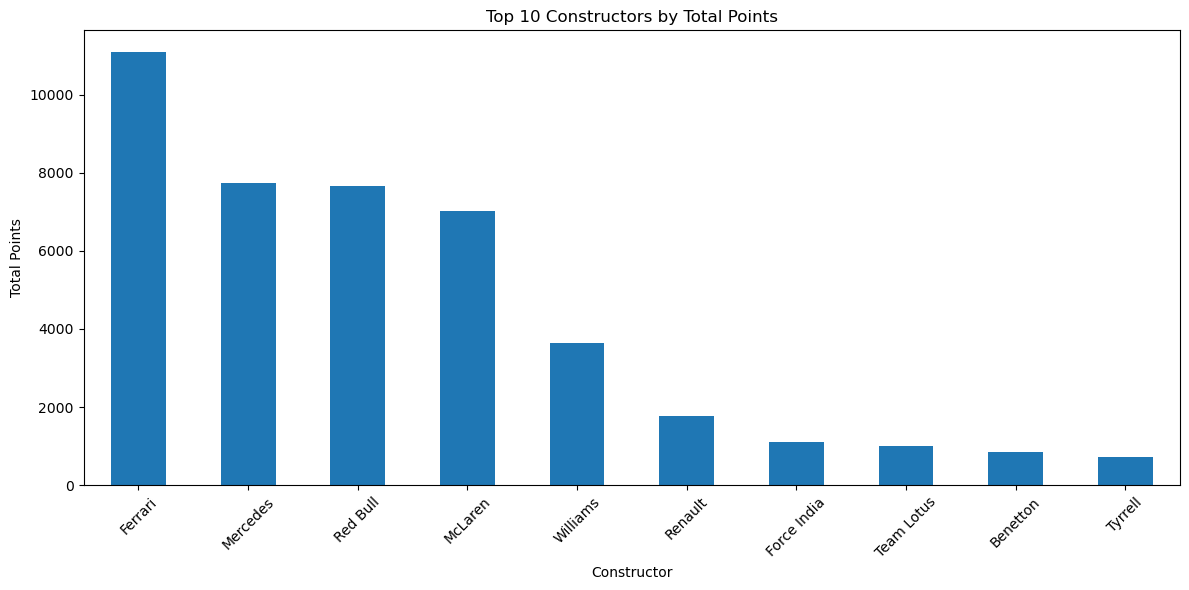

In [197]:
#the top constructors by total points so far
df1 = pd.read_csv("Data/results.csv")
df2 = pd.read_csv("Data/constructors.csv")
results_df = pd.merge(df1,df2,on='constructorId')
constructor_points = results_df.groupby('name')['points'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
constructor_points.plot(kind='bar')
plt.title('Top 10 Constructors by Total Points')
plt.xlabel('Constructor')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Correlation between Lap Times and Position')

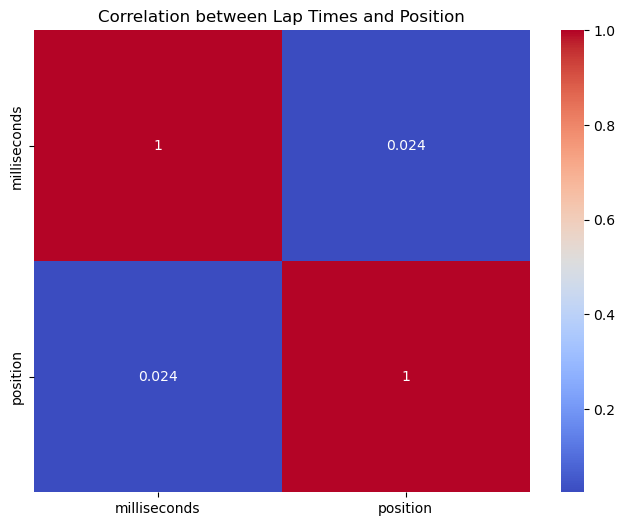

In [183]:
# Correlation between lap times and position
correlation_data = lap_times_df[['milliseconds', 'position']].copy()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Lap Times and Position')

In [170]:
# Merge lap times with races and drivers
merged_lap_data = pd.merge(pd.merge(lap_times_df, drivers_df, on='driverId'),races_df[['raceId', 'year', 'name']], on='raceId')
# Calculate yearly performance metrics
yearly_stats = merged_lap_data.groupby('year').agg({'milliseconds': ['mean', 'std', 'count'],'position': 'mean'}).reset_index()
        
yearly_stats

year   milliseconds                         position
                   mean            std  count       mean
0   1996   95365.320698   15729.901379  14431   8.195967
1   1997   91664.238173   16680.415428  17206   9.045624
2   1998   92302.041978   19152.443432  16175   8.958516
3   1999   93465.468236   15352.283849  15804   8.906479
4   2000   91959.537687   16101.558168  17977   9.257774
5   2001   89272.448926   19111.356215  17357   9.007778
6   2002   87732.987378   17458.863061  17350   8.902594
7   2003   87882.798479   14590.395396  16043   8.670261
8   2004   87941.333512   16875.262537  18608   9.069647
9   2005   89656.420121   28348.562739  19204   9.045563
10  2006   89764.232129   18988.348681  19920   9.544578
11  2007   92378.210295   41806.772150  19563   9.893830
12  2008   93500.349684   15151.730640  19449   9.378477
13  2009   96766.862621   17195.001635  17186   9.315548
14  2010  103102.132422   95339.626255  22534  10.702893
15  2011  108666.637079  231740.771338  24008  11.279865
16  2012  102404.190270   92865.451747  25343  11.262794
17  2013  100126.948725   43753.231807  22779  10.644322
18  2014  103577.413349  118425.718913  21021   9.910280
19  2015   97966.504205   17123.189783  19855   9.326417
20  2016  102144.501611   81204.459232  24513  10.306694
21  2017   95763.548136   44709.078508  20307   9.114197
22  2018   93546.574171   17958.033715  22246   9.412569
23  2019   92978.937862   15759.454585  23625   9.956995
24  2020   95174.427391   83413.280974  18400   9.502228
25  2021   97003.021066  109434.995350  23688   9.740417
26  2022   98189.390327   92049.280285  23529   9.676484
27  2023   98297.081358  101698.560065  24386   9.764414
28  2024   95100.162640   81683.558557  26574   9.783887

In [172]:
report = {
            'total_races': len(races_df),
            'total_drivers': len(drivers_df),
            'avg_lap_time': lap_times_df['milliseconds'].mean() / 1000,  # in seconds
            'fastest_lap': lap_times_df['milliseconds'].min() / 1000,  # in seconds
            'total_laps_recorded': len(lap_times_df),
            'years_covered': f"{races_df['year'].min()} - {races_df['year'].max()}"
        }
report

{'total_races': 1125,
 'total_drivers': 861,
 'avg_lap_time': 95.79944524267461,
 'fastest_lap': 55.404,
 'total_laps_recorded': 589081,
 'years_covered': '1950 - 2024'}